# #houseprice pridiction

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\house_prize'

In [4]:
os.chdir('C:\\Users\\Lenovo\\Downloads\\house-prices-advanced-regression-techniques')

In [5]:
os.getcwd()

'C:\\Users\\Lenovo\\Downloads\\house-prices-advanced-regression-techniques'

In [6]:
df=pd.read_csv("train.csv")
dft=pd.read_csv("test.csv")

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
dft.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
dft.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [11]:
df.isnull().sum().sum()

6965

In [12]:
dft.isnull().sum().sum()

7000

In [13]:
features_na=[features for features in df.columns if df[features].isnull().sum()>1]

In [14]:
features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

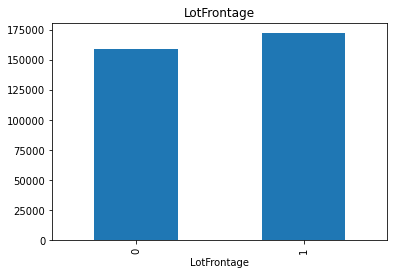

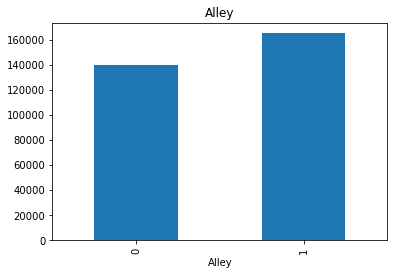

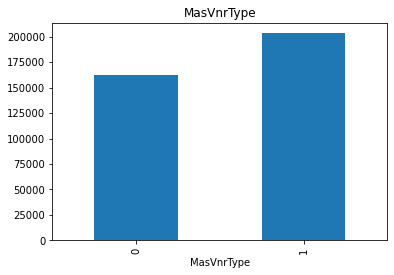

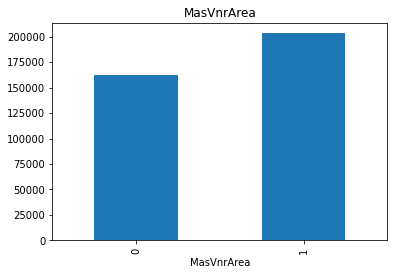

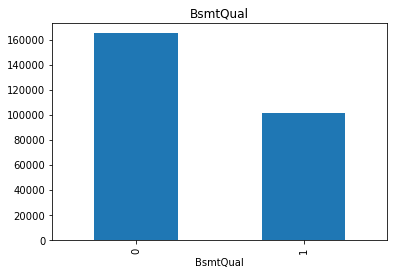

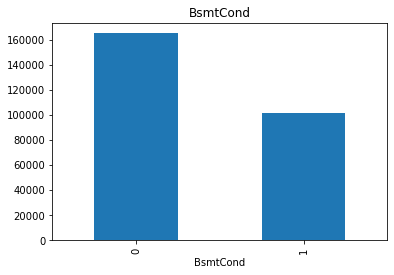

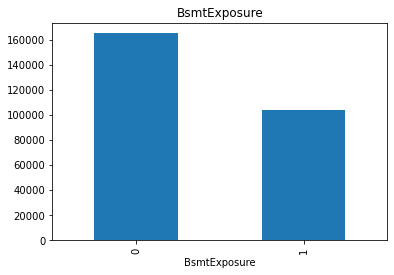

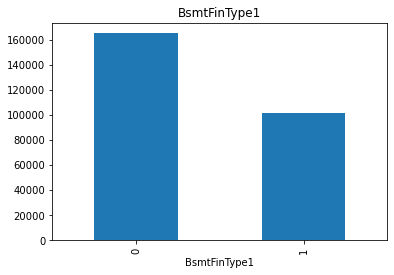

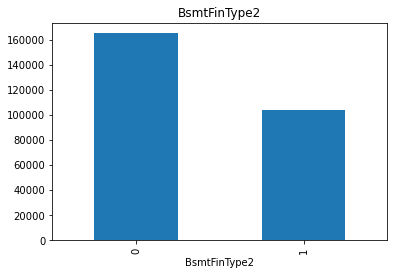

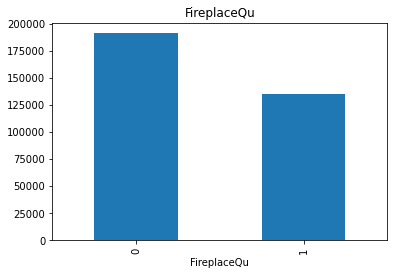

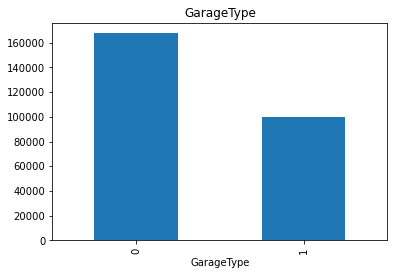

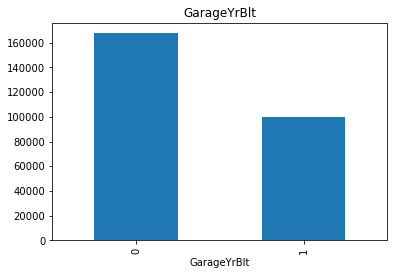

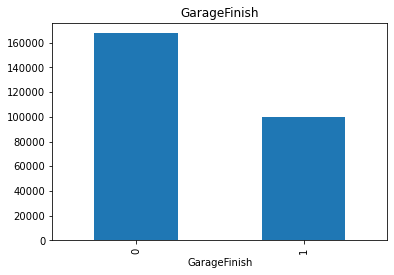

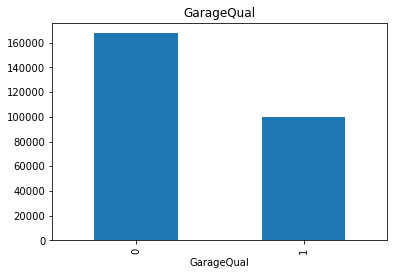

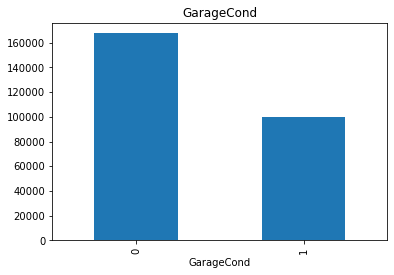

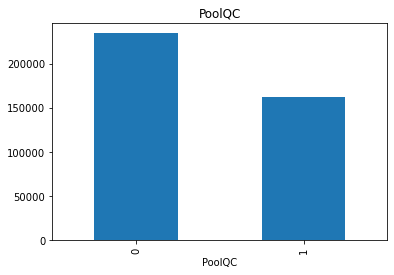

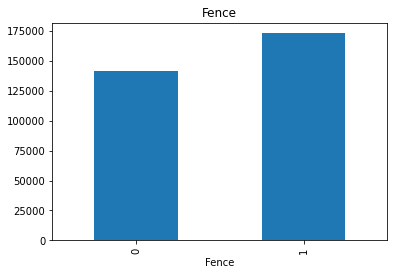

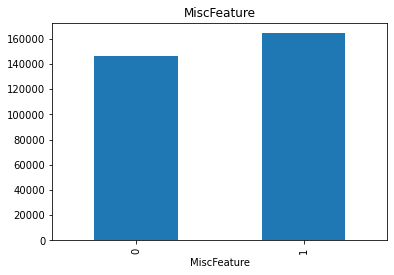

In [15]:
for feature in features_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    mp.title(feature)
    mp.show()


(1460, 81)

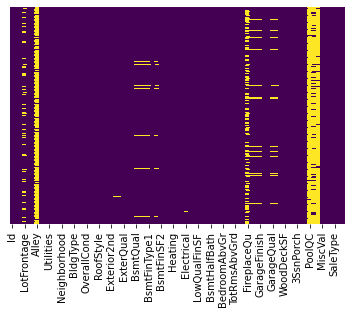

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.shape


(1459, 80)

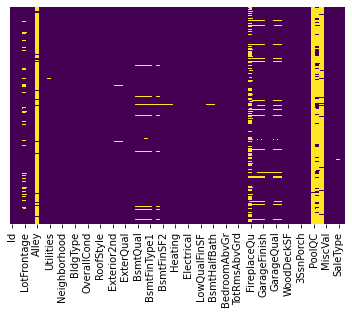

In [17]:
sns.heatmap(dft.isnull(),yticklabels=False,cbar=False,cmap='viridis')
dft.shape

In [18]:
year_feature = [feature for feature in df if 'Yr' in feature or 'Year' in feature]

year_feature


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

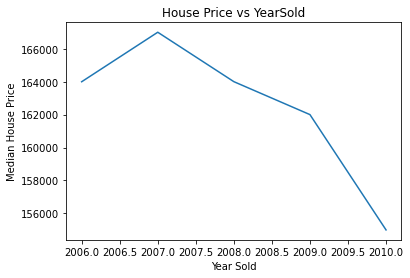

In [19]:
df.groupby('YrSold')['SalePrice'].median().plot()
mp.xlabel('Year Sold')
mp.ylabel('Median House Price')
mp.title("House Price vs YearSold")

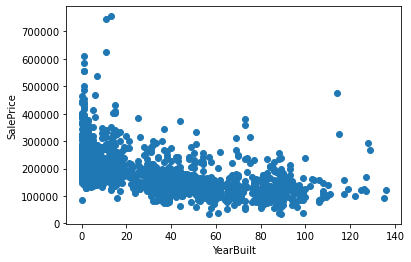

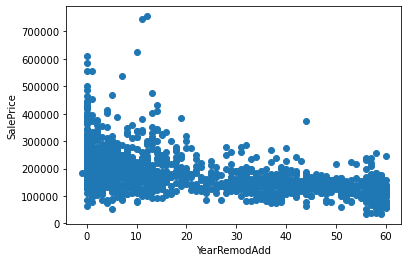

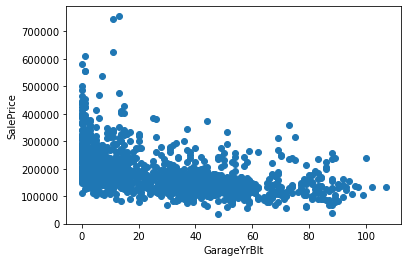

In [20]:
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]

        mp.scatter(data[feature],data['SalePrice'])
        mp.xlabel(feature)
        mp.ylabel('SalePrice')
        mp.show()

In [21]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [22]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [23]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [24]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


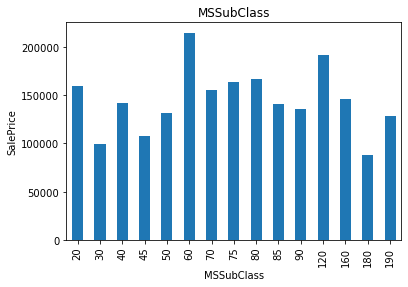

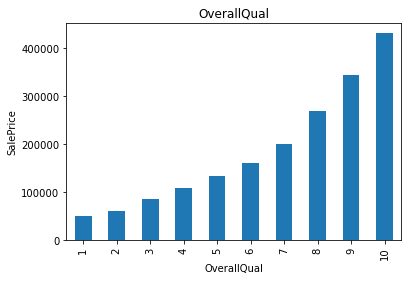

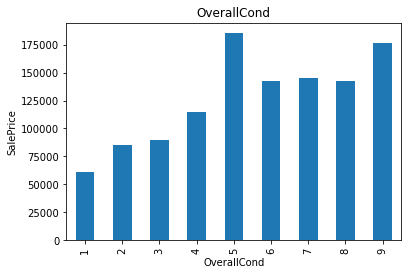

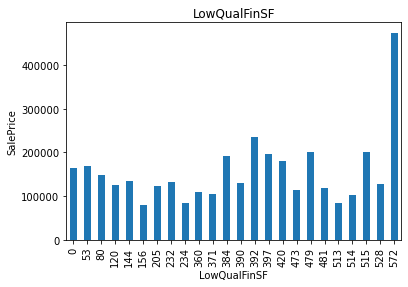

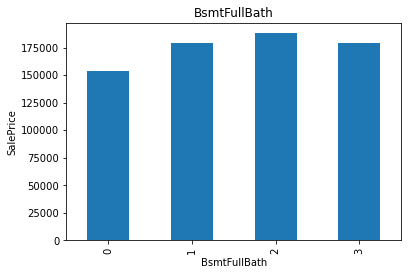

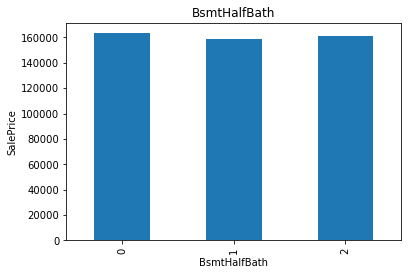

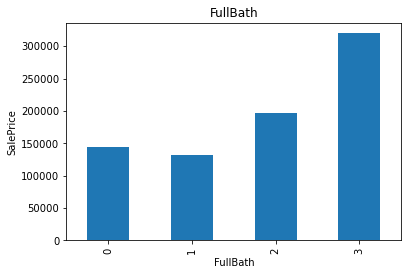

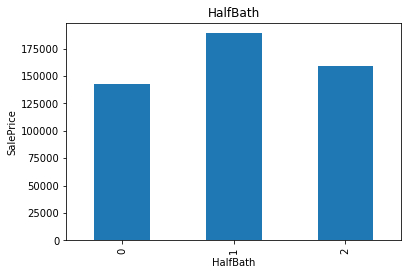

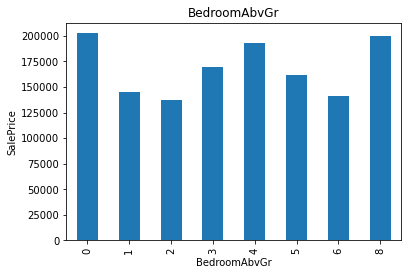

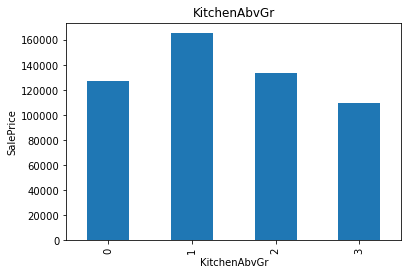

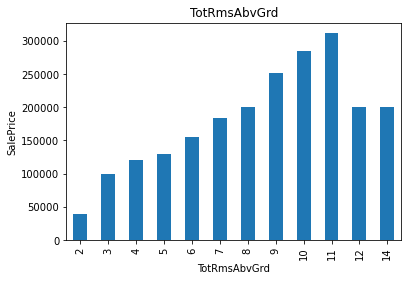

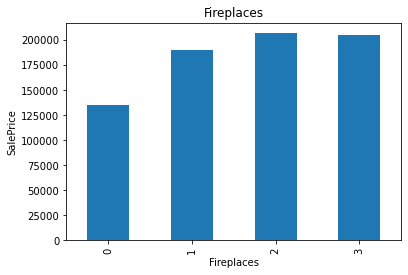

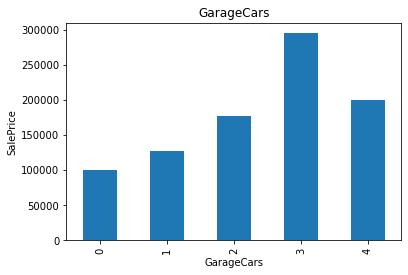

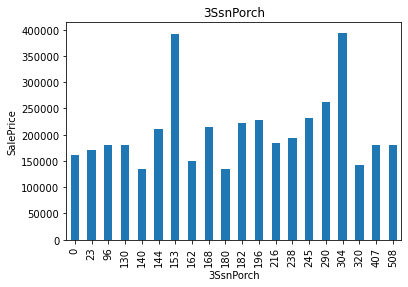

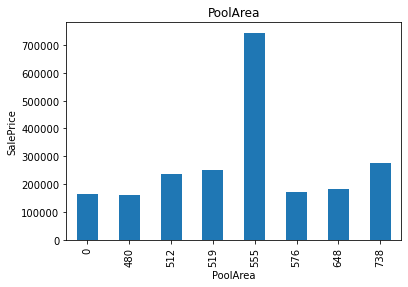

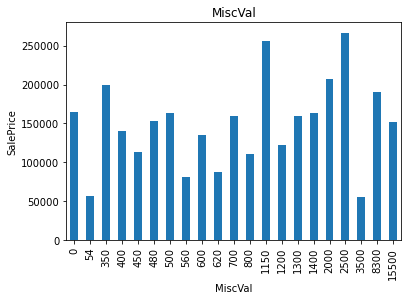

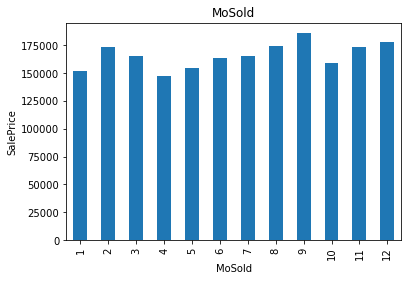

In [25]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    mp.xlabel(feature)
    mp.ylabel('SalePrice')
    mp.title(feature)
    mp.show()

In [26]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


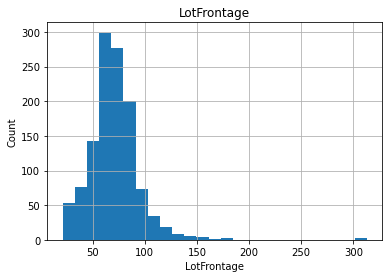

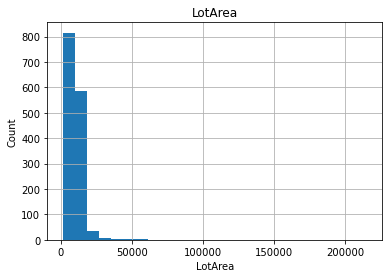

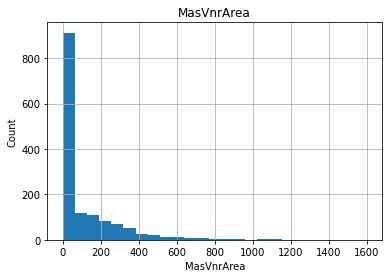

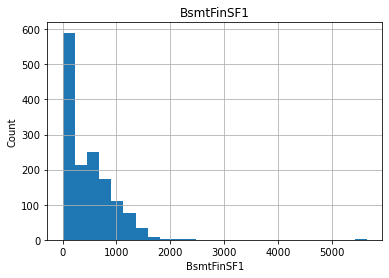

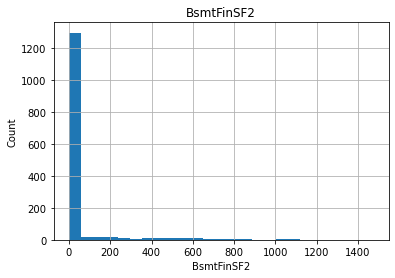

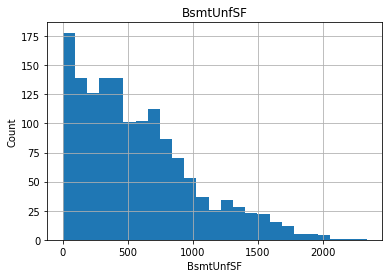

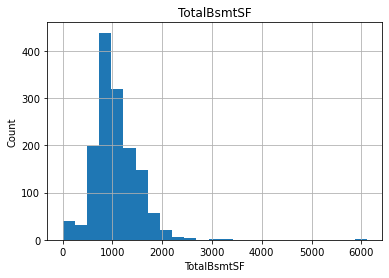

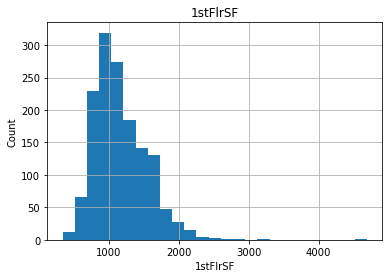

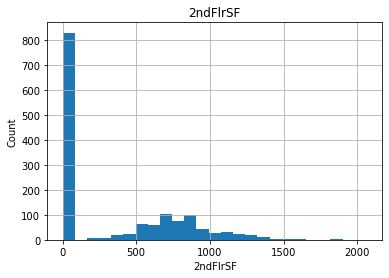

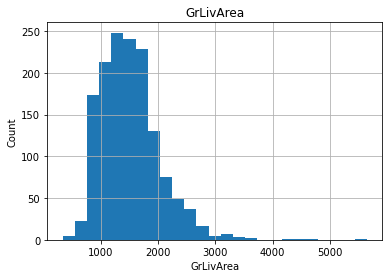

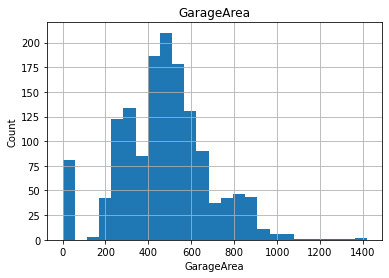

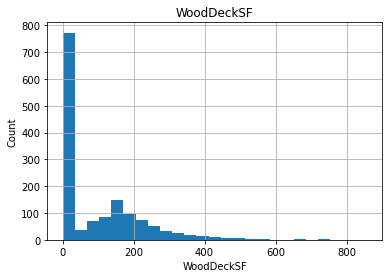

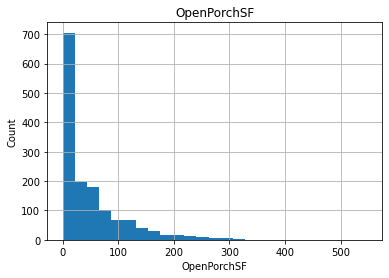

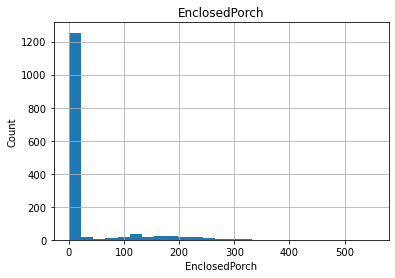

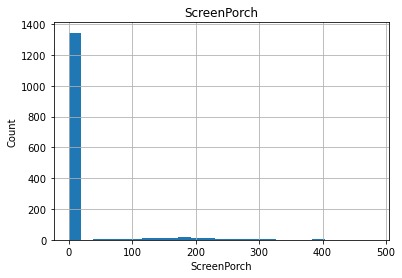

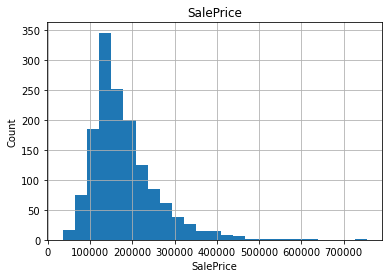

In [27]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    mp.xlabel(feature)
    mp.ylabel("Count")
    mp.title(feature)
    mp.show()

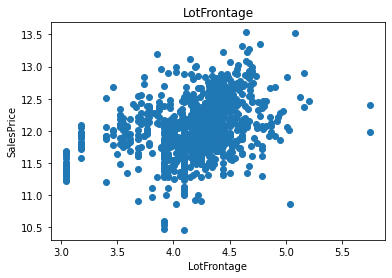

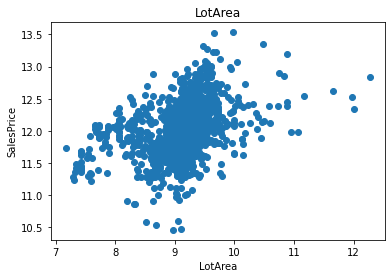

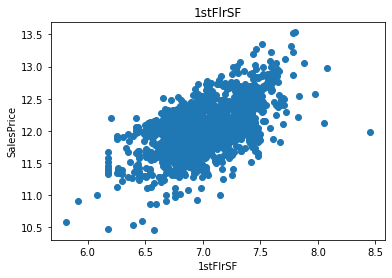

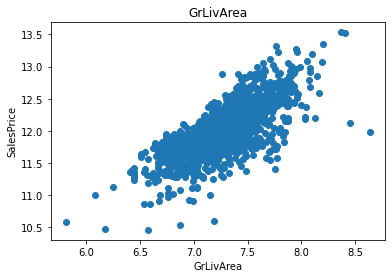

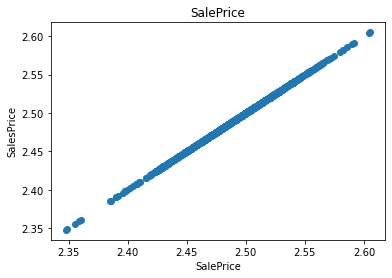

In [28]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        mp.scatter(data[feature],data['SalePrice'])
        mp.xlabel(feature)
        mp.ylabel('SalesPrice')
        mp.title(feature)
        mp.show()

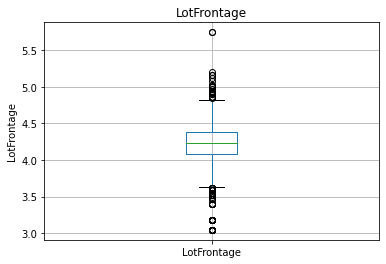

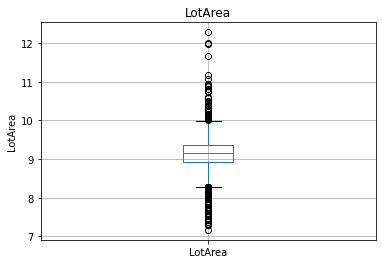

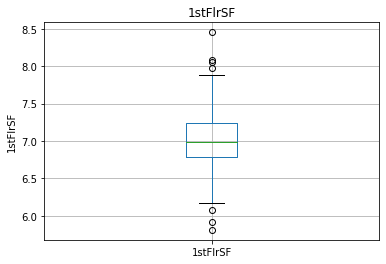

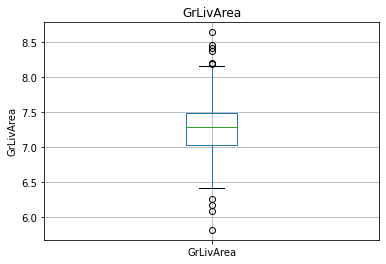

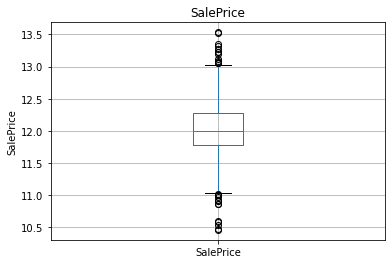

In [29]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        mp.ylabel(feature)
        mp.title(feature)
        mp.show()

In [30]:
categorical_col=[cname for cname in df.columns if df[cname].dtypes=='object']
len(categorical_col)

43

In [31]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [32]:
dft['LotFrontage']=dft['LotFrontage'].fillna(dft['LotFrontage'].mean())

In [33]:
df['Alley'].isnull().sum()

1369

In [34]:
dft['Alley'].isnull().sum()

1352

In [35]:
df.drop(['Alley'],axis=1,inplace=True)

In [36]:
dft.drop(['Alley'],axis=1,inplace=True)

In [37]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [38]:
dft['BsmtCond']=dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0])
dft['BsmtQual']=dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0])

In [39]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [40]:

dft['FireplaceQu']=dft['FireplaceQu'].fillna(dft['FireplaceQu'].mode()[0])
dft['GarageType']=dft['GarageType'].fillna(dft['GarageType'].mode()[0])

In [41]:




df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [42]:
dft.drop(['GarageYrBlt'],axis=1,inplace=True)

In [43]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [44]:
dft['GarageFinish']=dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0])
dft['GarageQual']=dft['GarageQual'].fillna(dft['GarageQual'].mode()[0])
dft['GarageCond']=dft['GarageCond'].fillna(dft['GarageCond'].mode()[0])

In [45]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [46]:
dft.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 78, dtype: int64

In [47]:
print("Shape of train: ", df.shape)

Shape of train:  (1460, 79)


In [48]:
print("Shape of train: ", dft.shape)

Shape of train:  (1459, 78)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

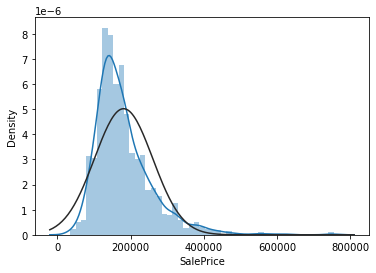

In [49]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df['SalePrice'] , fit = norm)

In [50]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [51]:
dft.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [52]:
df['PoolQC'].isnull().sum()

1453

In [53]:
dft['PoolQC'].isnull().sum()

1456

In [54]:
df.drop(['PoolQC'],axis=1,inplace=True)

In [55]:
dft.drop(['PoolQC'],axis=1,inplace=True)

In [56]:
df.isnull().sum().sum()

2715

In [57]:
dft.isnull().sum().sum()

2758

In [58]:
df['Fence'].isnull().sum()

1179

In [59]:
dft['Fence'].isnull().sum()

1169

In [60]:
df.drop(['Fence'],axis=1,inplace=True)

In [61]:
dft.drop(['Fence'],axis=1,inplace=True)

In [62]:
df.isnull().sum().sum()

1536

In [63]:
dft.isnull().sum().sum()

1589

In [64]:
df['MiscFeature'].isnull().sum()

1406

In [65]:
dft['MiscFeature'].isnull().sum()

1408

In [66]:
df.drop(['MiscFeature'],axis=1,inplace=True)

In [67]:
dft.drop(['MiscFeature'],axis=1,inplace=True)

In [68]:
df.isnull().sum().sum()

130

In [69]:
dft.isnull().sum().sum()

181

In [70]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [71]:
data=dft.columns

In [72]:
df['SalePrice'].isnull().sum()

0

In [73]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [74]:
dft['BsmtExposure']=dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0])
dft['BsmtFinType1']=dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0])
dft['BsmtFinType2']=dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0])
dft['MasVnrType']=dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0])
dft['MasVnrArea']=dft['MasVnrArea'].fillna(dft['MasVnrArea'].mode()[0])
dft['Electrical']=dft['Electrical'].fillna(dft['Electrical'].mode()[0])
dft['MSZoning']=dft['MSZoning'].fillna(dft['MSZoning'].mode()[0])
dft['SaleType']=dft['SaleType'].fillna(dft['SaleType'].mode()[0])
dft['Utilities']=dft['Utilities'].fillna(dft['Utilities'].mode()[0])
dft['Exterior1st']=dft['Exterior1st'].fillna(dft['Exterior1st'].mode()[0])
dft['Exterior2nd']=dft['Exterior2nd'].fillna(dft['Exterior2nd'].mode()[0])
dft['BsmtFinSF1']=dft['BsmtFinSF1'].fillna(dft['BsmtFinSF1'].mode()[0])
dft['BsmtFinSF2']=dft['BsmtFinSF2'].fillna(dft['BsmtFinSF2'].mode()[0])
dft['BsmtUnfSF']=dft['BsmtUnfSF'].fillna(dft['BsmtUnfSF'].mode()[0])
dft['TotalBsmtSF']=dft['TotalBsmtSF'].fillna(dft['TotalBsmtSF'].mode()[0])
dft['BsmtFullBath']=dft['BsmtFullBath'].fillna(dft['BsmtFullBath'].mode()[0])
dft['BsmtHalfBath']=dft['BsmtHalfBath'].fillna(dft['BsmtHalfBath'].mode()[0])
dft['KitchenQual']=dft['KitchenQual'].fillna(dft['KitchenQual'].mode()[0])
dft['Functional']=dft['Functional'].fillna(dft['Functional'].mode()[0])
dft['GarageCars']=dft['GarageCars'].fillna(dft['GarageCars'].mode()[0])
dft['GarageArea']=dft['GarageArea'].fillna(dft['GarageArea'].mode()[0])

In [75]:
df.isnull().sum().sum()

0

In [76]:
dft.isnull().sum().sum()

0

In [77]:
for feature in data:
    null=dft[feature].isnull().sum()
    print(feature,"=",null)

Id = 0
MSSubClass = 0
MSZoning = 0
LotFrontage = 0
LotArea = 0
Street = 0
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 0
MasVnrArea = 0
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 0
BsmtCond = 0
BsmtExposure = 0
BsmtFinType1 = 0
BsmtFinSF1 = 0
BsmtFinType2 = 0
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 0
GarageType = 0
GarageFinish = 0
GarageCars = 0
GarageArea = 0
GarageQual = 0
GarageCond = 0
PavedDrive = 0
WoodDeckSF = 0
OpenPorchSF = 0
EnclosedPorch = 0
3SsnPo

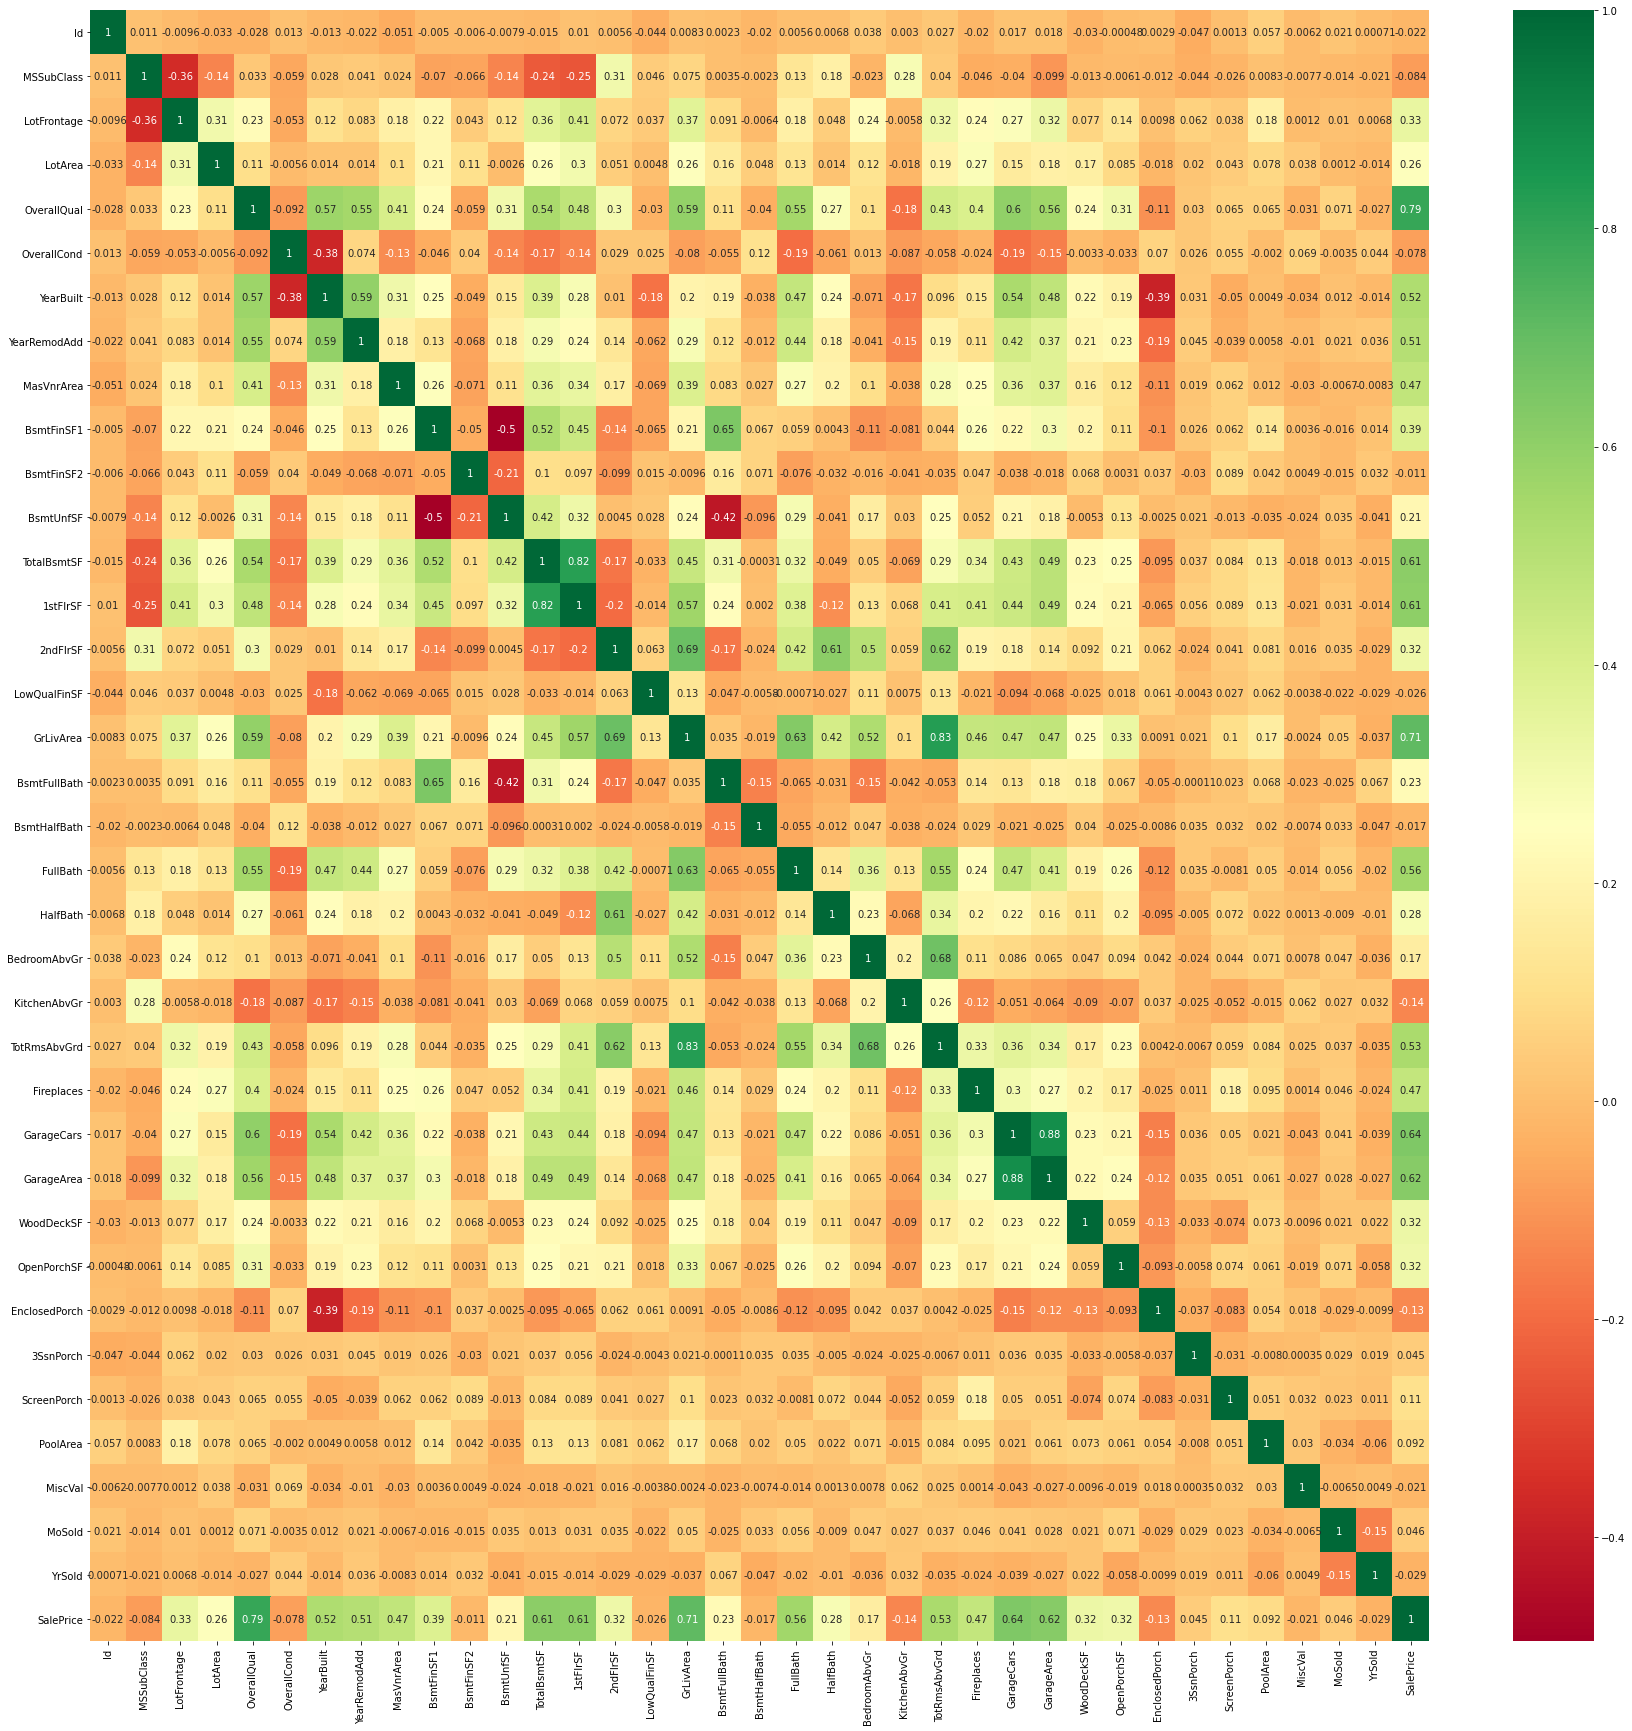

In [78]:
corelation=df.corr()
#top_corr=corrmat.index
mp.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

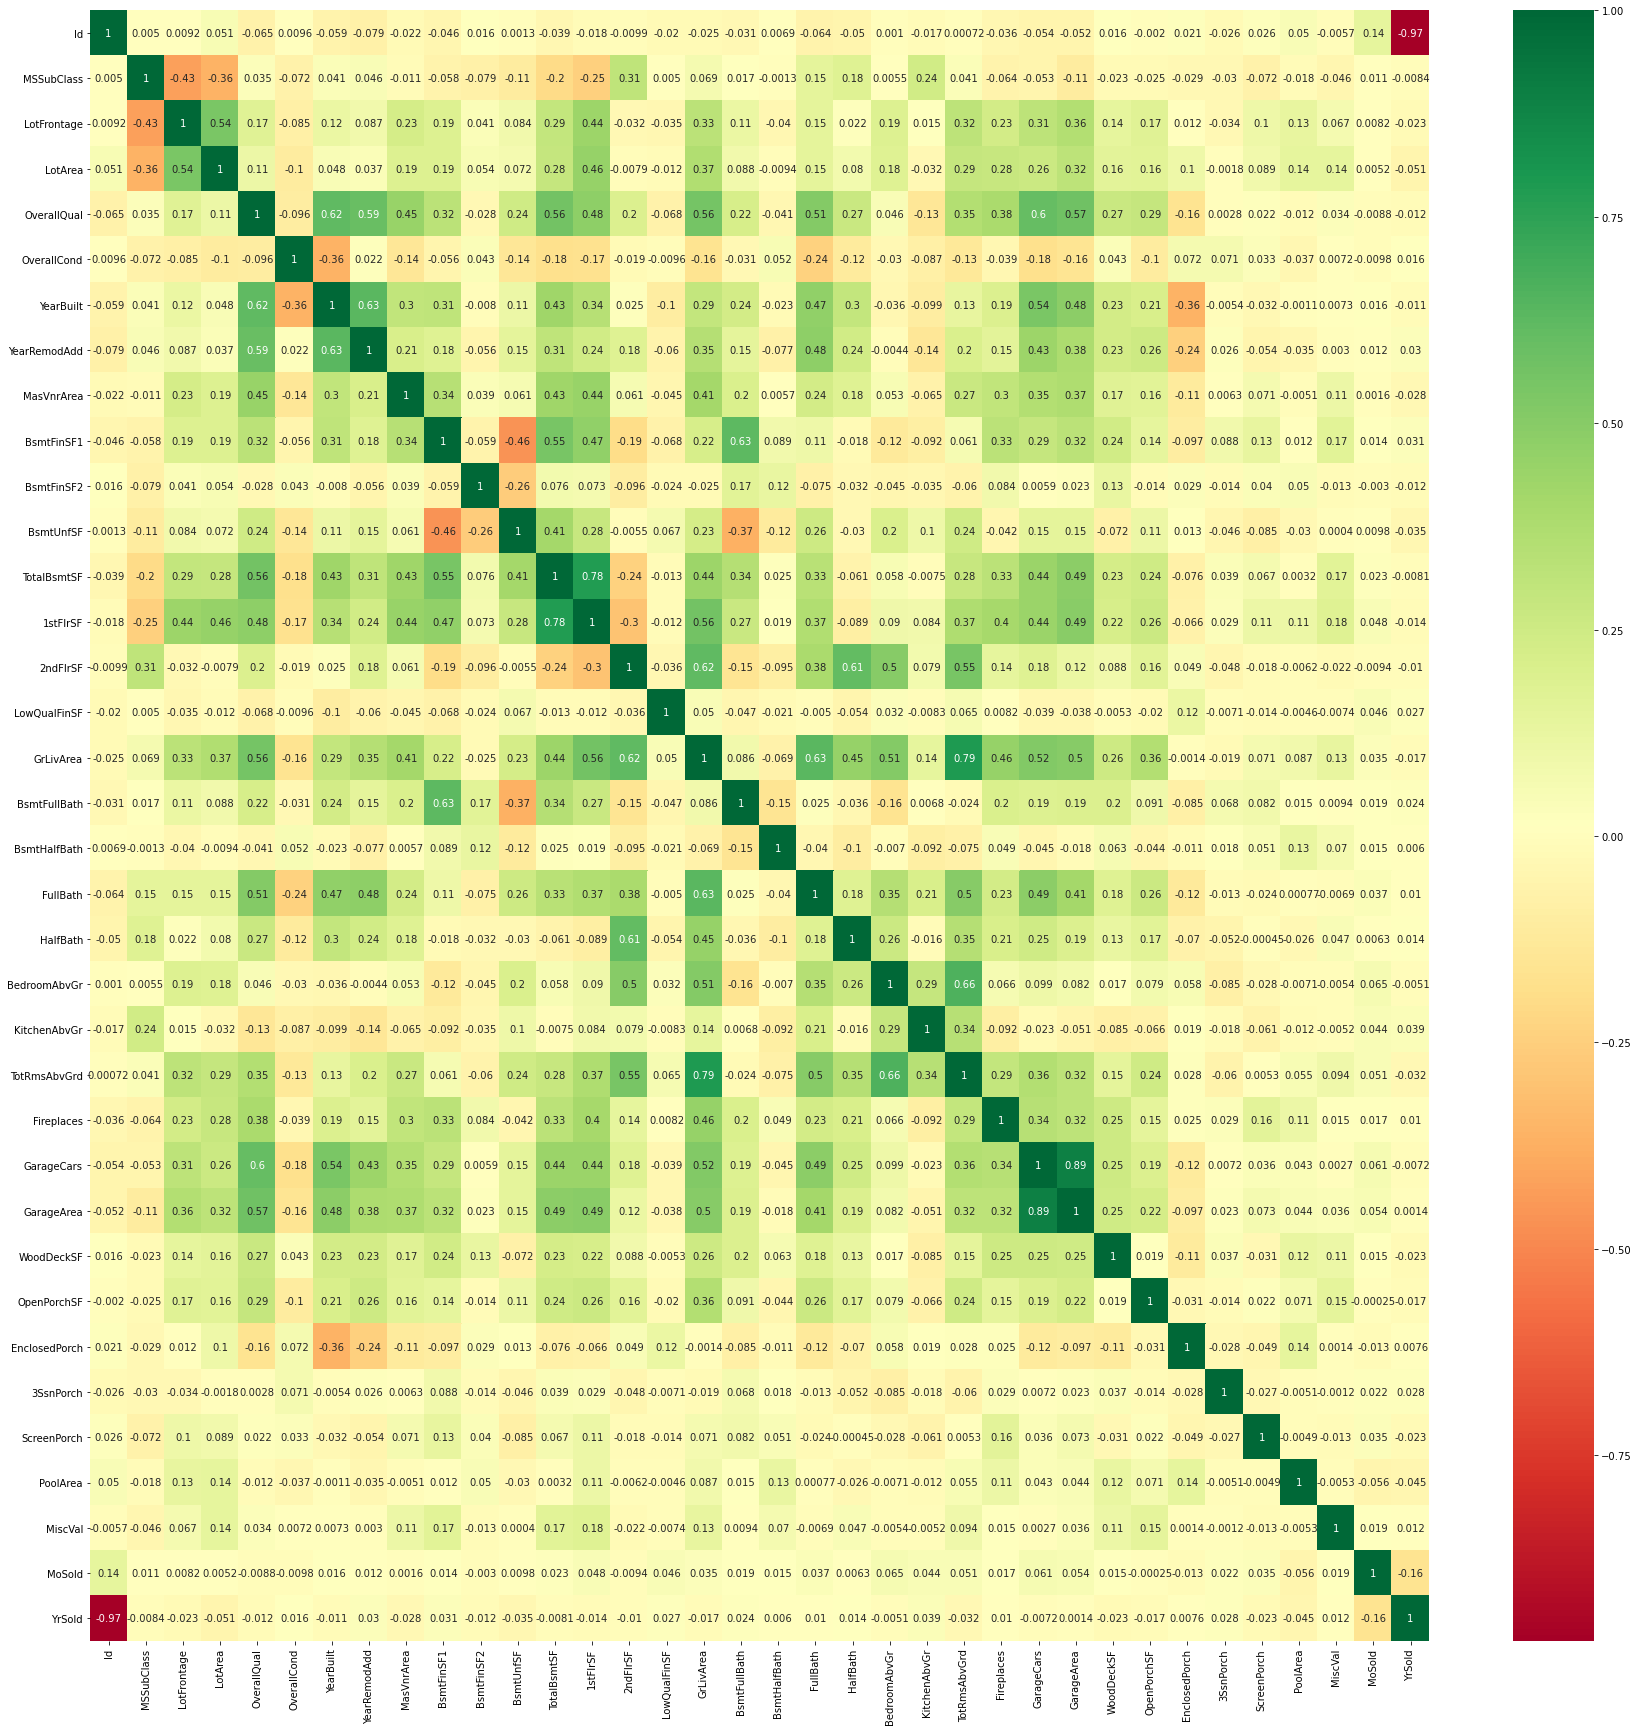

In [79]:
corelation=dft.corr()
#top_corr=corrmat.index
mp.figure(figsize=(30,30))
g=sns.heatmap(dft.corr(),annot=True,cmap="RdYlGn")

In [80]:
categorical_col=[cname for cname in df.columns if df[cname].dtypes=='object']
numerical_col=[cname for cname in df.columns if df[cname].dtypes!='object']
print(categorical_col)
print(numerical_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'M

In [81]:
#from sklearn import preprocessing
#lable_encoder = preprocessing.LabelEncoder()
#for feature in categorical_col:
#    df[feature]=lable_encoder.fit_transform(df[feature])
#    df[feature].unique()

In [82]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


(1459, 75)

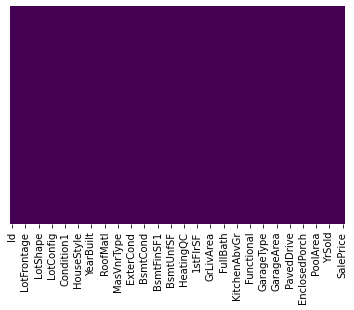

In [83]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
dft.shape

(1459, 75)

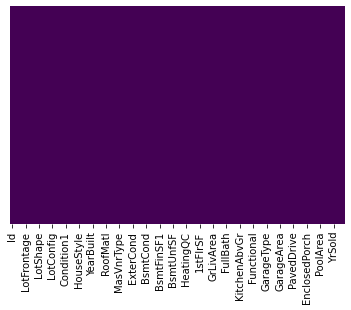

In [84]:
sns.heatmap(dft.isnull(),yticklabels=False,cbar=False,cmap='viridis')
dft.shape

In [85]:
print(categorical_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [86]:
len(categorical_col)

39

In [87]:
final_df=pd.concat([df,dft],axis=0)

In [88]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [89]:
final_df.shape

(2919, 76)

In [90]:
final_df.isnull().sum().sum()

1459

In [91]:
categorical_col=[cname for cname in final_df.columns if final_df[cname].dtypes=='object']

In [92]:
len(categorical_col)
#print(categorical_col)

39

In [93]:
for feature in categorical_col:
    labels_ordered=final_df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    final_df[feature]=final_df[feature].map(labels_ordered)
    

In [94]:
final_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,1,1,0,...,0,0,0,0,0,2,2008,4,4,208500.0
1,2,20,3,80.0,9600,1,0,1,1,1,...,0,0,0,0,0,5,2007,4,4,181500.0
2,3,60,3,68.0,11250,1,1,1,1,0,...,0,0,0,0,0,9,2008,4,4,223500.0
3,4,70,3,60.0,9550,1,1,1,1,2,...,272,0,0,0,0,2,2006,4,1,140000.0
4,5,60,3,84.0,14260,1,1,1,1,1,...,0,0,0,0,0,12,2008,4,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,21.0,1936,1,0,1,1,0,...,0,0,0,0,0,6,2006,4,4,NaN
1455,2916,160,1,21.0,1894,1,0,1,1,0,...,0,0,0,0,0,4,2006,4,1,NaN
1456,2917,20,3,160.0,20000,1,0,1,1,0,...,0,0,0,0,0,9,2006,4,1,NaN
1457,2918,85,3,62.0,10441,1,0,1,1,0,...,0,0,0,0,700,7,2006,4,4,NaN


# this is for kaggle compitation

In [95]:
final_df.shape

(2919, 76)

In [96]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [97]:
final_df.shape

(2919, 76)

In [98]:
df.shape

(1460, 76)

In [99]:
dft.shape

(1459, 75)

In [100]:
df_train=final_df.iloc[:1460,:]
df_test=final_df.iloc[1460:,:]

In [101]:
df_train.shape

(1460, 76)

In [102]:
df_test.shape

(1459, 76)

In [103]:
df_test.drop(['SalePrice'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [104]:
df_test.shape

(1459, 74)

In [105]:
y_train=df_train[['SalePrice']]

In [106]:
x_train=df_train.drop(['Id','SalePrice'],axis=1)

In [107]:
df_train.shape

(1460, 76)

In [108]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [109]:
y_pred=classifier.predict(df_test)

In [110]:
import pickle
filename='finalized_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [111]:
y_pred=classifier.predict(df_test)

In [112]:
y_pred

array([127487.99 , 160981.05 , 182967.48 , ..., 165343.38 , 117751.055,
       174784.1  ], dtype=float32)

In [113]:
len(y_pred)

1459

In [114]:
#create submission file
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('finalll.csv',index=False)

In [115]:
len(datasets)

1459

In [116]:
fial=pd.read_csv('finalll.csv')

# trying different models

In [127]:
y_train=df_train[['SalePrice']]
x_train=df_train.drop(['Id','SalePrice'],axis=1)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25)

In [166]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2912\399607455.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train,y_train)


RandomForestRegressor()

In [167]:
y_pred=random.predict(x_test)
#y_pre=random.predict(y_train)

In [168]:
from sklearn.metrics import mean_absolute_percentage_error
accuracy = 100 - mean_absolute_percentage_error(y_test,y_pred)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.89 %.


In [169]:
from sklearn.metrics import mean_squared_error as mse
error=mse(y_test,y_pred)
print(error)

949856689.0569162


In [182]:
acc=mean_absolute_percentage_error(y_test,y_pred)
acc
print("R2 score:%.2f" % r2_score(y_test,y_pred))
print("mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

R2 score:0.86
mean squared error:949856689.06


In [171]:
from sklearn import metrics
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  18783.313589041092
Mean Squared Error :  949856689.0569162
Root Mean Squared Error :  30819.745116676684


<AxesSubplot:xlabel='SalePrice'>

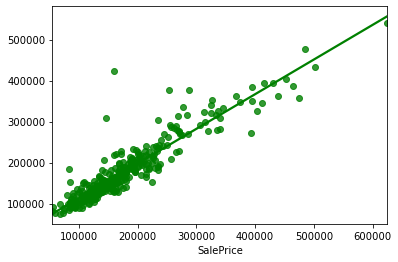

In [172]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="g")

In [136]:
print(y_pred.shape)
print(y_test.shape)

(365,)
(365, 1)


In [137]:
print(y_test)
print(y_pred)

      SalePrice
1324   147000.0
1255   127500.0
630    124000.0
1363   156932.0
1400   120000.0
...         ...
563    185000.0
1383   112000.0
122    136000.0
699    196000.0
632     82500.0

[365 rows x 1 columns]
[297509.66 126515.5  124736.59 167634.8  114899.04 162242.5  177738.18
 130296.   267747.71 150597.5  333559.79 145510.94  81385.    96112.69
 228516.11 165361.83 171012.05 188471.5  203394.62 175486.68 131239.5
 127576.5   97839.23 162697.53 152056.74 136913.83 135474.27 119395.14
  98128.5  178092.36 275692.06 135262.33 367407.92 205661.63 179875.07
 173271.41 179293.73 130148.    95872.   145544.14 142329.5  109452.58
 150559.5  126319.16 210111.15  97703.   106140.33 121746.73 132889.13
 137712.74 163317.43 131436.68 139355.   384577.88 103670.83  97854.54
 136354.6   96035.33 149347.39 150071.25 190921.6  216763.8  187627.8
 182233.67 243513.61 389760.64 134340.08 133158.6  145731.   136126.5
 179822.78 210778.8  127638.1  207873.04 180093.83 147767.83 317023.36
 31596

In [140]:
from sklearn.linear_model import Lasso,Ridge
lasso=Lasso()
ridge=Ridge()
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

Ridge()

In [141]:
lasso.fit(x_train,y_train)

Lasso()

In [142]:
y_pred_ridge=ridge.predict(x_test)

In [143]:
y_pred_lasso=lasso.predict(x_test)

In [144]:
from sklearn.metrics import mean_absolute_percentage_error
accuracy = 100 - mean_absolute_percentage_error(y_test,y_pred_ridge)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.86 %.


In [183]:
print("R2 score:%.2f" % r2_score(y_test,y_pred_ridge))

R2 score:0.69


In [145]:
from sklearn.metrics import mean_absolute_percentage_error
accuracy = 100 - mean_absolute_percentage_error(y_test,y_pred_lasso)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.86 %.


In [184]:
print("R2 score:%.2f" % r2_score(y_test,y_pred_lasso))

R2 score:0.69


In [146]:
from sklearn.metrics import mean_squared_error as mse
error=mse(y_test,y_pred_ridge)
print(error)

2021328478.7989151


<AxesSubplot:xlabel='SalePrice'>

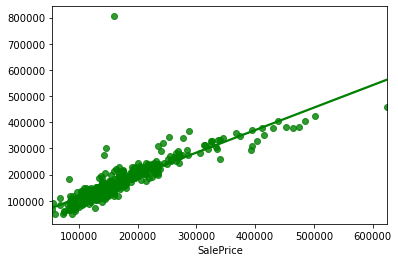

In [160]:
sns.regplot(x=y_test, y=y_pred_ridge, ci=None, color="g")

In [180]:
from sklearn.metrics import mean_squared_error as mse
error=mse(y_test,y_pred_lasso).mean()
print(error)

2015838885.3701935


<AxesSubplot:xlabel='SalePrice'>

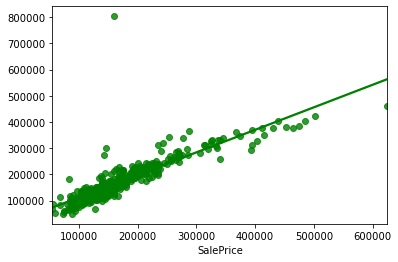

In [159]:
sns.regplot(x=y_test, y=y_pred_lasso, ci=None, color="g")

# by absorbed each and every model like Lesso,Rigde and RandomForestRegresor , RandomForestRegresor is good model compared to all the model